In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import SMOTE


import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [74]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [75]:
train_dataset = '../data/mitbih_train.csv'
test_dataset = '../data/mitbih_test.csv'


train_df = pd.read_csv (train_dataset,header=None)
test_df = pd.read_csv (test_dataset,header=None)

print ('infromation about train data')
train_df.info()
print ('\n infromation about test data')
test_df.info()


infromation about train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB

 infromation about test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [76]:
# show number of target classes
print ('number of target classes')
train_df[187].astype(int).value_counts()

number of target classes


187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [77]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


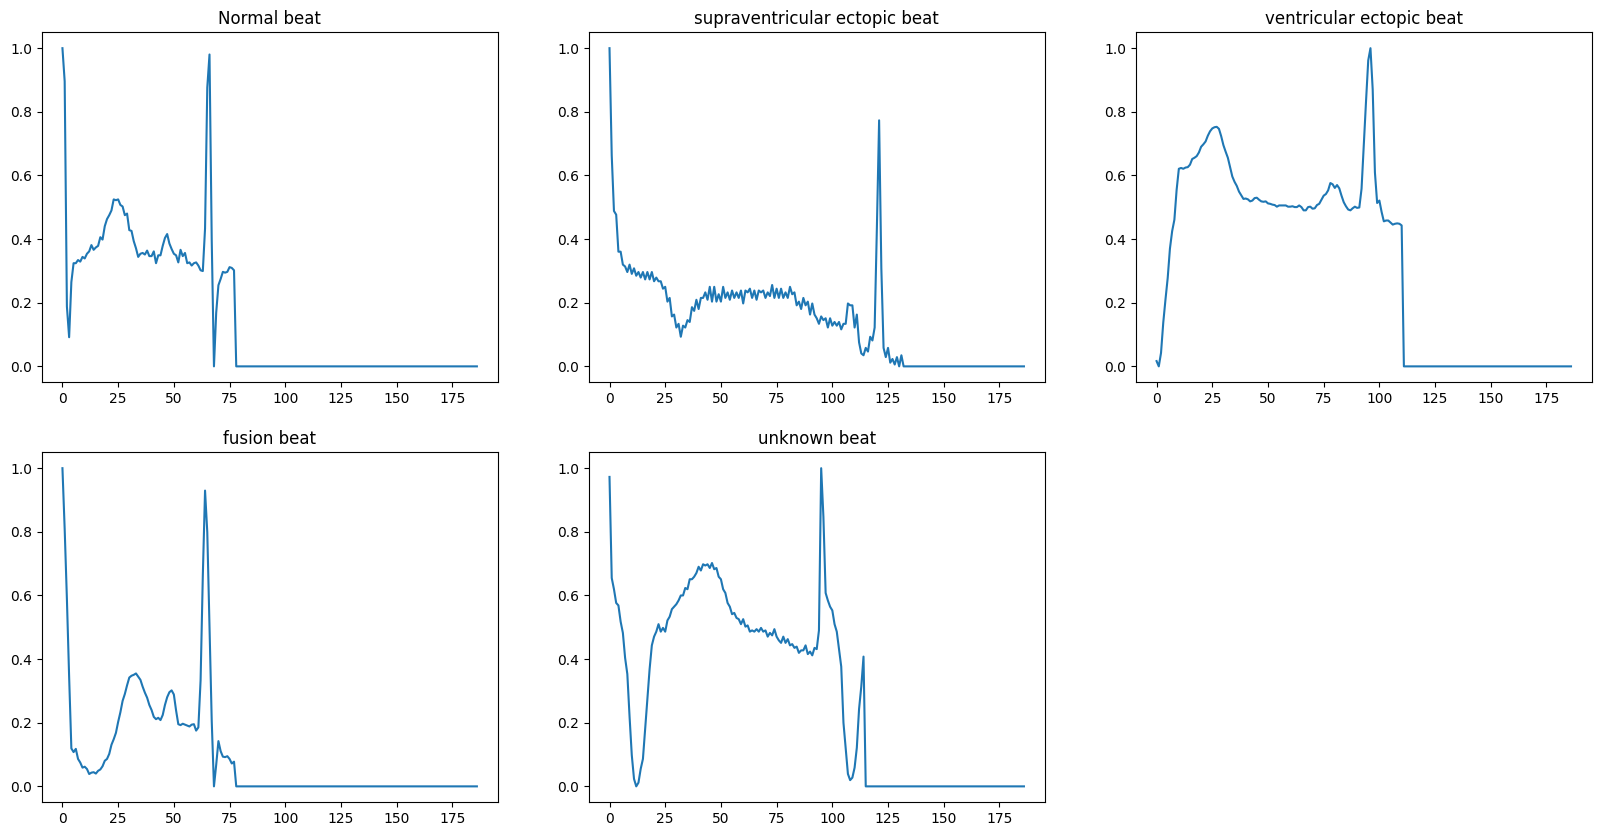

In [79]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.plot (range (0,187), (train_df.loc[train_df[187] ==0]).sample(1).iloc [:,:-1].values[0] )
plt.title ('Normal beat')

plt.subplot(2,3,2)
plt.plot ( (train_df.loc [train_df[187] ==1]).sample(1).iloc [:,:-1].values[0])
plt.title ('supraventricular ectopic beat')

plt.subplot(2,3,3)
plt.plot ( (train_df.loc [train_df[187] ==2]).sample(1).iloc [:,:-1].values[0])
plt.title ('ventricular ectopic beat')

plt.subplot(2,3,4)
plt.plot ( (train_df.loc [train_df[187] ==3]).sample(1).iloc [:,:-1].values[0])
plt.title ('fusion beat')

plt.subplot(2,3,5)
plt.plot ( (train_df.loc [train_df[187] ==4]).sample(1).iloc [:,:-1].values[0])
plt.title ('unknown beat')

plt.show()

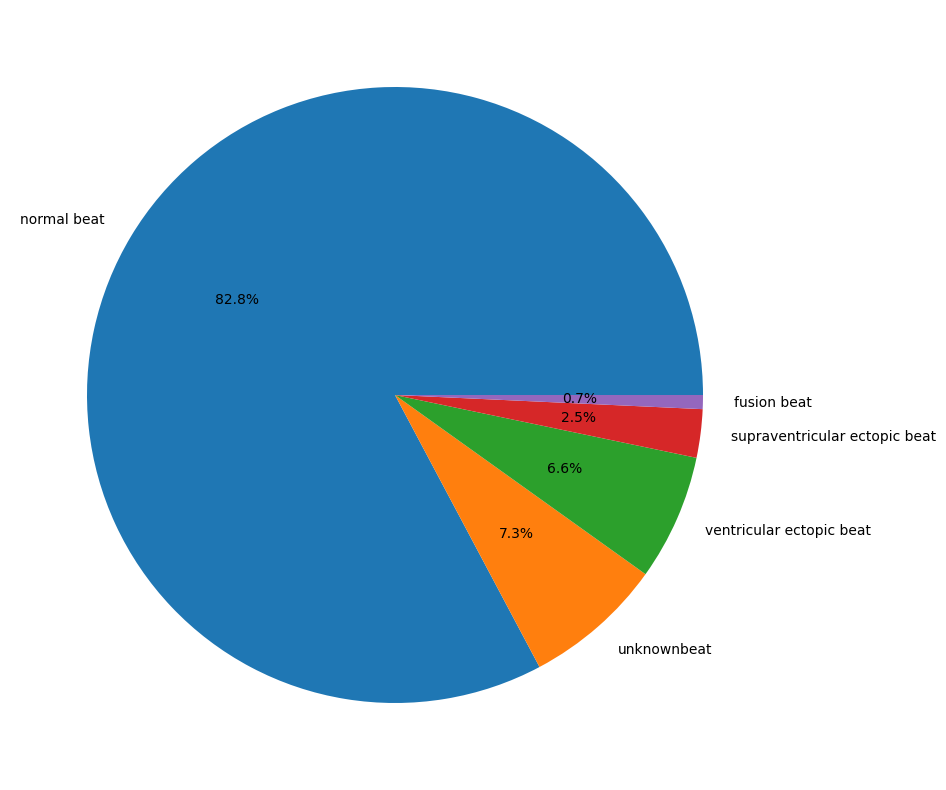

In [80]:
beats = ['normal beat' ,'unknownbeat','ventricular ectopic beat' , 'supraventricular ectopic beat' , 'fusion beat' ]
plt.figure(figsize=(20,10))
plt.pie (train_df [187].value_counts().values,labels = beats,autopct='%1.1f%%')
plt.show()

In [81]:
smote = SMOTE (sampling_strategy='all',random_state=42)
x =train_df.drop (columns =187)
y = train_df[187]
x,y = smote.fit_resample (x,y)
train_df = pd.concat([x,y],axis = 1)

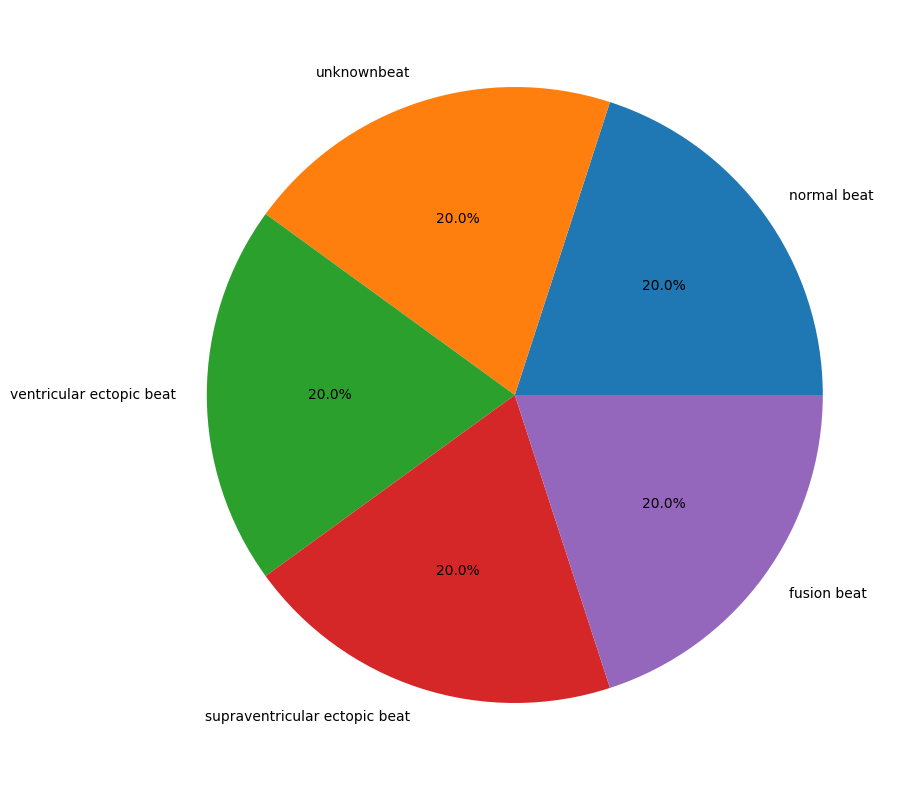

In [82]:
plt.figure(figsize=(20,10))
plt.pie (train_df [187].value_counts().values,labels = beats,autopct='%1.1f%%')
plt.show()

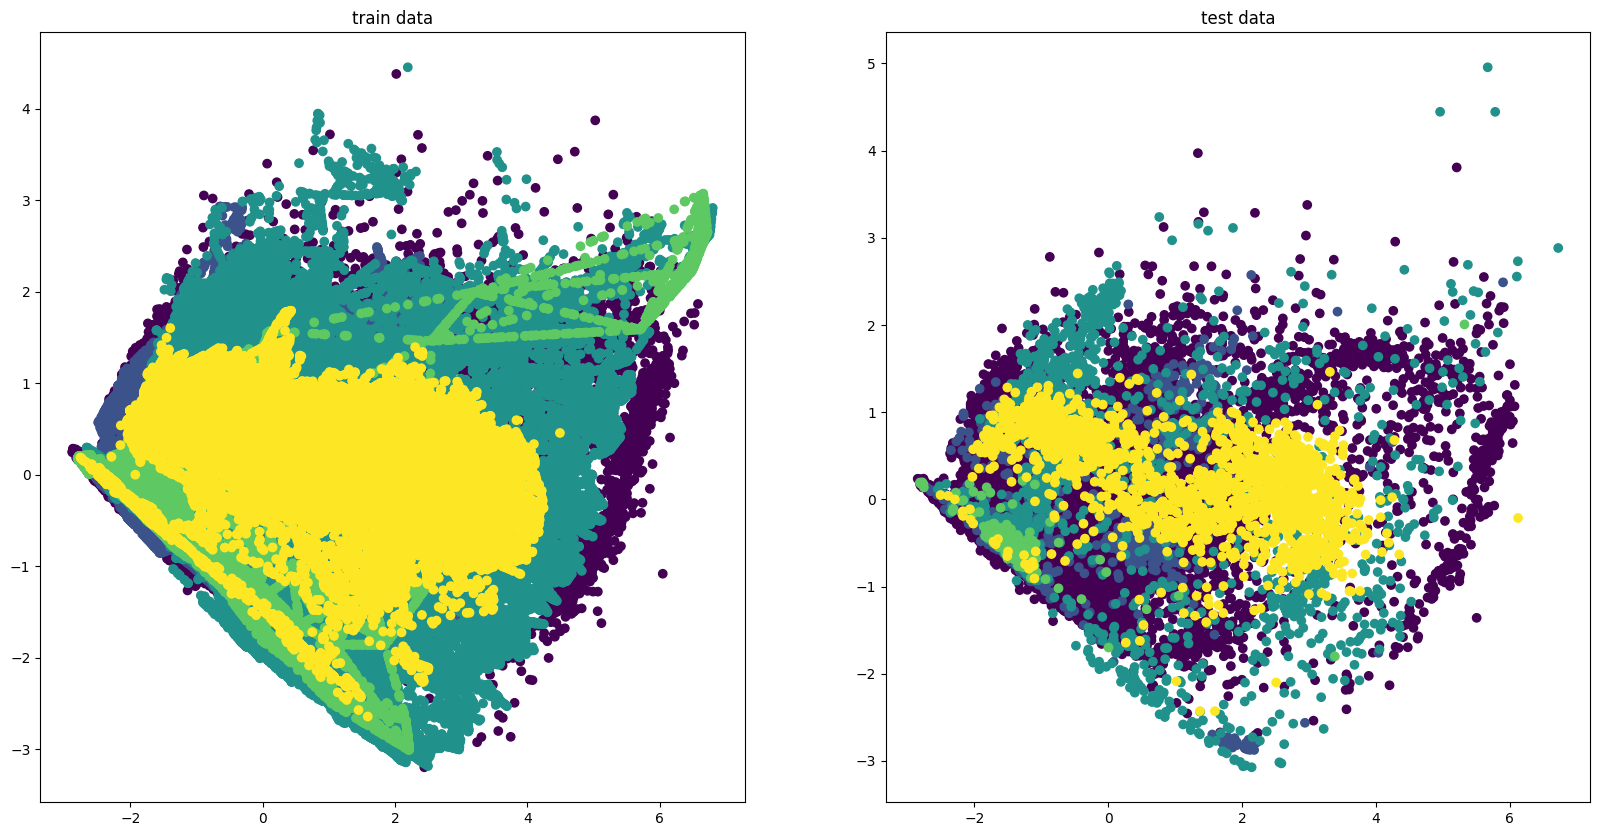

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_df.drop(columns=187))
pca_train = pca.transform(train_df.drop(columns=187))
pca_test = pca.transform(test_df.drop(columns=187))
pca_train = pd.DataFrame(pca_train)
pca_test = pd.DataFrame(pca_test)
pca_train['target'] = train_df[187]
pca_test['target'] = test_df[187]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(pca_train[0],pca_train[1],c=pca_train['target'])
plt.title('train data')
plt.subplot(1,2,2)
plt.scatter(pca_test[0],pca_test[1],c=pca_test['target'])
plt.title('test data')
plt.show()

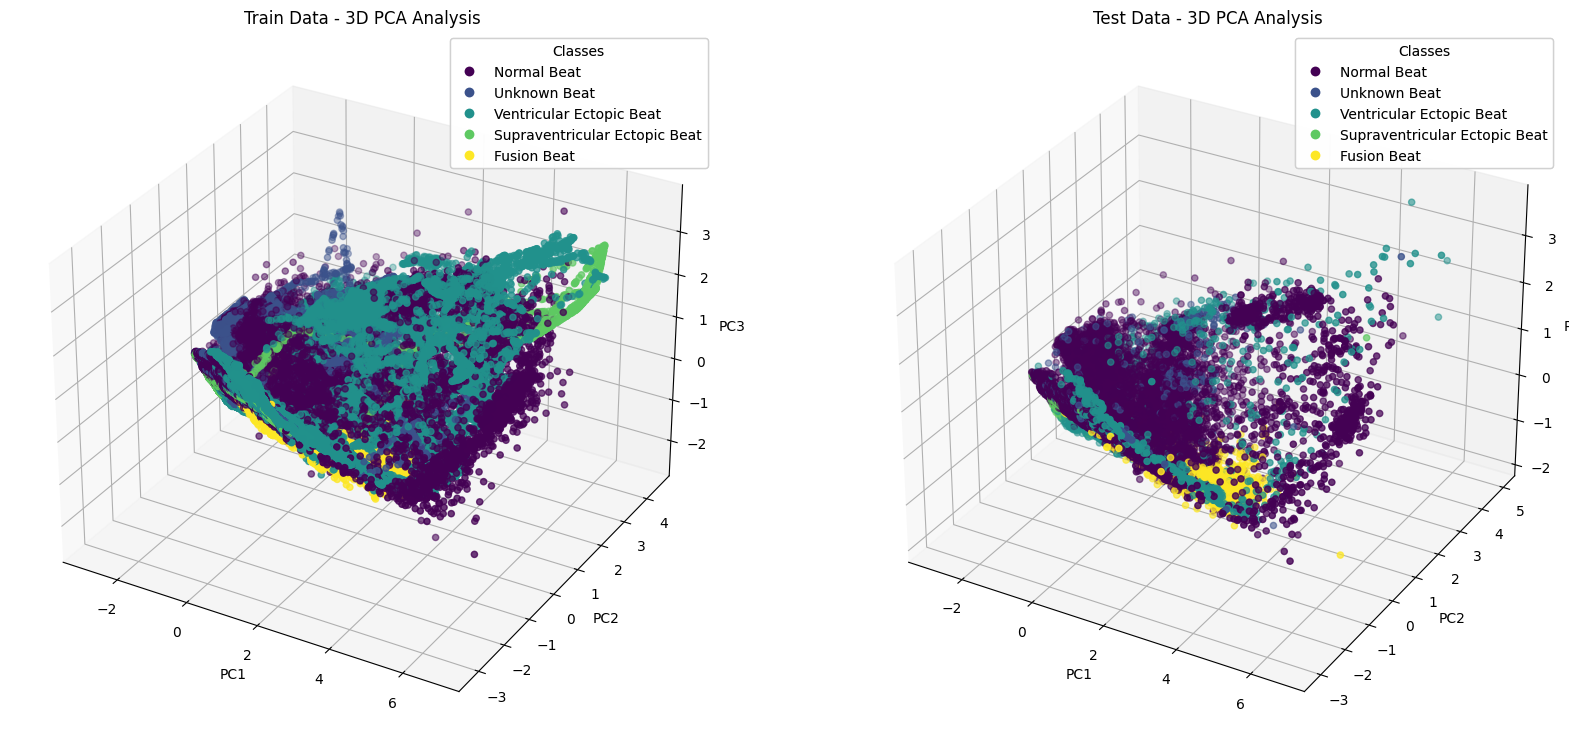

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


train_df[187] = train_df[187].astype(int)

pca = PCA(n_components=3)
pca.fit(train_df.drop(columns=187))

pca_train = pca.transform(train_df.drop(columns=187))
pca_test = pca.transform(test_df.drop(columns=187))

pca_train = pd.DataFrame(pca_train, columns=['PC1', 'PC2', 'PC3'])
pca_test = pd.DataFrame(pca_test, columns=['PC1', 'PC2', 'PC3'])

pca_train['target'] = train_df[187]
pca_test['target'] = test_df[187]

label_mapping = {0: 'Normal Beat', 1: 'Unknown Beat', 2: 'Ventricular Ectopic Beat', 3: 'Supraventricular Ectopic Beat', 4: 'Fusion Beat'}

pca_train['target_label'] = pca_train['target'].map(label_mapping)
pca_test['target_label'] = pca_test['target'].map(label_mapping)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(pca_train['PC1'], pca_train['PC2'], pca_train['PC3'], c=pca_train['target'], cmap='viridis')

legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=label_mapping.values(), title='Classes', bbox_to_anchor=(1, 1))
ax.add_artist(legend1)

ax.set_title('Train Data - 3D PCA Analysis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(pca_test['PC1'], pca_test['PC2'], pca_test['PC3'], c=pca_test['target'], cmap='viridis')

legend2 = plt.legend(handles=scatter.legend_elements()[0], labels=label_mapping.values(), title='Classes', bbox_to_anchor=(1, 1))
ax.add_artist(legend2)

ax.set_title('Test Data - 3D PCA Analysis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


In [ ]:
# add pca features to train and test data
train_df['PC1'] = pca_train['PC1']
train_df['PC2'] = pca_train['PC2']
train_df['PC3'] = pca_train['PC3']

test_df['PC1'] = pca_test['PC1']
test_df['PC2'] = pca_test['PC2']
test_df['PC3'] = pca_test['PC3']

# drop old features
train_df.drop(columns=[0, 1, 2, 3, 4], inplace=True)
test_df.drop(columns=[0, 1, 2, 3, 4], inplace=True)

train_df.head()


In [1]:
# Now use Deep Learning to classify the data

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Activation

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.utils import class_weight

NotFoundError: dlopen(/Users/lithasan/.local/lib/python3.10/site-packages/tensorflow-plugins/libmetal_plugin.dylib, 0x0006): symbol not found in flat namespace '__ZN10tensorflow8internal10LogMessage16VmoduleActivatedEPKci'